In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load dataset (Iris)
iris = load_iris()
X = iris.data[:, :2]   # Use first two features for visualization
y = (iris.target != 0) * 1  # Binary classification: Iris-setosa vs others

In [3]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Initialize and train single-layer perceptron
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

In [5]:
# Predict
y_pred = model.predict(X_test)

In [8]:
#Evaluate performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.9777777777777777


In [9]:
# Plot decision boundary
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


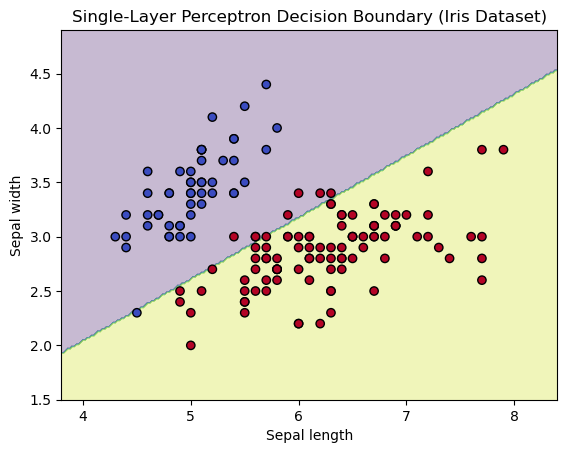

In [10]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Single-Layer Perceptron Decision Boundary (Iris Dataset)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()


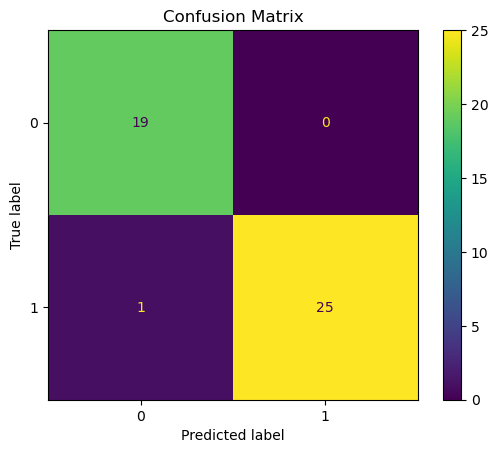

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()
